In [4]:
from correlate_tweets import correlate_data

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [1]:
ts_all = correlate_data()

print(ts_all.head())
print('total clinton tweets: {}'.format(ts_all.clinton.sum()))

NameError: name 'correlate_data' is not defined

In [135]:
print('total trump tweets: {}'.format(ts_all.trump.sum()))

total trump tweets: 1017


In [ ]:
# ts_all.dropna(inplace=True)
# ts_all.head()

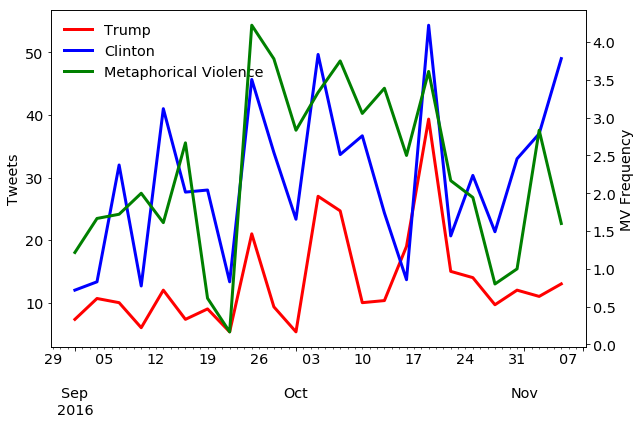

In [10]:
from matplotlib.lines import Line2D
from datetime import datetime

ts_all = ts_all[ts_all.index < datetime(2016,11,9)]

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
ts_all[['trump', 'clinton']].resample('3d').mean().plot(ax=ax1, color=['r', 'b'], lw=3)
ts_all['metvi_all'].resample('3d').mean().plot(ax=ax2, color='green', label='MetVi', lw=3)

lines = [
    Line2D([0], [0], color='r', lw=3), 
    Line2D([0], [0], color='b', lw=3),
    Line2D([0], [0], color='g', lw=3)
]
labels = ['Trump', 'Clinton', 'Metaphorical Violence']

ax1.legend(lines, labels, frameon=False)

ax1.set_ylabel('Tweets')
ax2.set_ylabel('MV Frequency');

Text(0,0.5,'MV Frequency (All)')

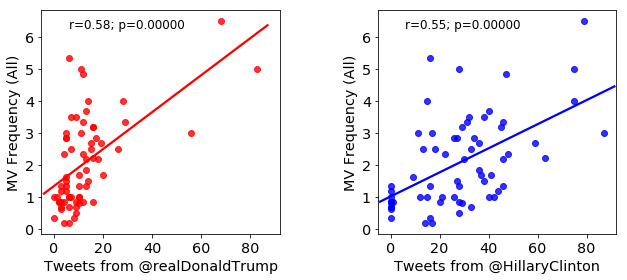

In [145]:
import seaborn as sns

from scipy.stats import pearsonr


fig, axes = plt.subplots(1, 2, figsize=(9.5, 4))

xl = 'trump'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]
# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g1 = sns.regplot(x=x, y=y, ax=axes[0], color='red', ci=None)

axes[0].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)

xl = 'clinton'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]

# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g2 = sns.regplot(x=x, y=y, ax=axes[1], color='blue', ci=None)
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_xlim(axes[0].get_xlim() + np.array([-1.0, 5.0]))
axes[1].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)
axes[0].set_xlim(axes[1].get_xlim())
plt.subplots_adjust(wspace=2.0)

axes[0].set_xlabel('Tweets from @realDonaldTrump')
axes[1].set_xlabel('Tweets from @HillaryClinton')
axes[0].set_ylabel('MV Frequency (All)')
axes[1].set_ylabel('MV Frequency (All)')
# plt.tight_layout()

## Impact of tweets on different facets of MV use

Above we have regressions of counts of frequency of all metaphorical violence usage against the number of tweets by each 2016 candidate. Now we do the same thing, but for MV frequency on each network and casting each candidate as the subject or object of metaphorical violence.

In [172]:
from correlate_tweets import plot_regressions
ts_all = correlate_data()

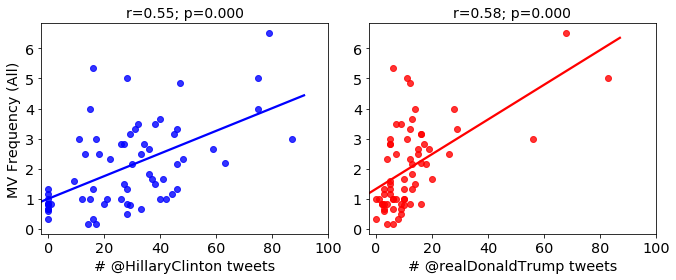

In [173]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all.pdf')

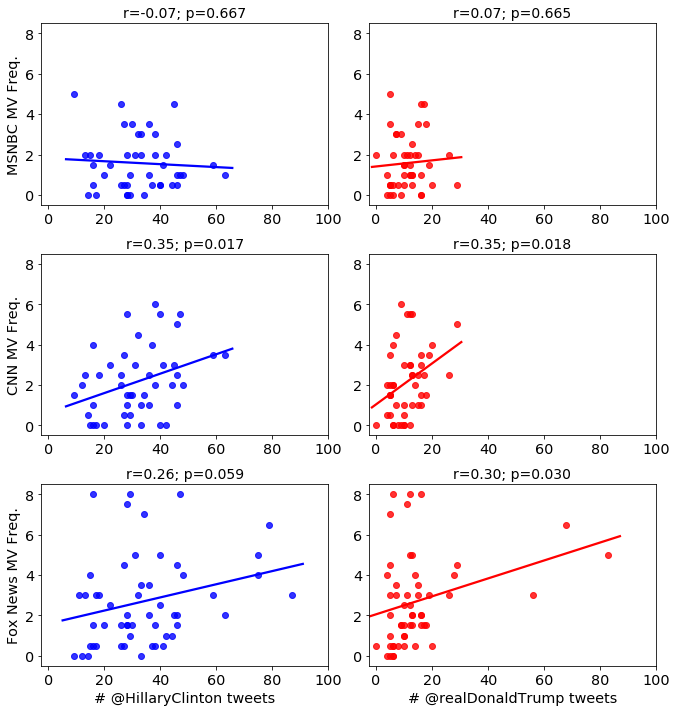

In [112]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-by-network.pdf')

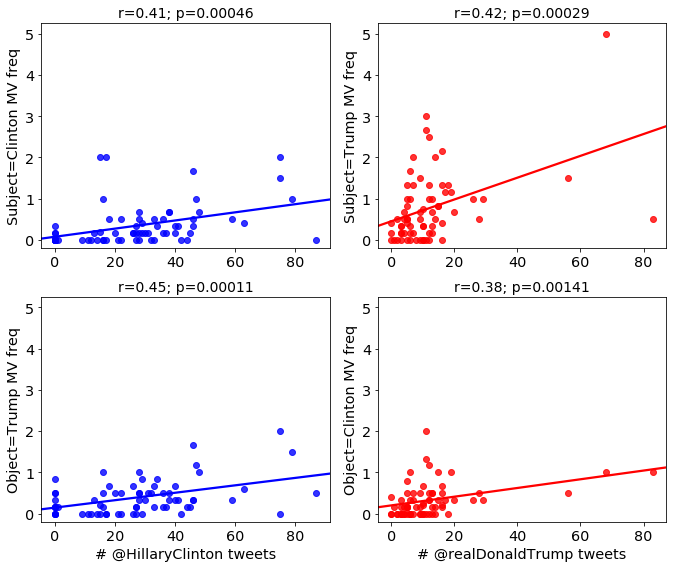

In [132]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj.pdf')

## Metvi-Tweet regressions for 2012 

In [169]:
ts_all = correlate_data(year=2012)
ts_all.head()

,metvi_all,metvi_cnn,metvi_foxnews,metvi_msnbc,metvi_obama_obj,metvi_obama_subj,metvi_romney_obj,metvi_romney_subj,obama,romney
2012-08-31,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
2012-09-01,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,24.0,1.0
2012-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.0
2012-09-03,4.666667,NaN,9,2.5,0.666667,0.333333,1.333333,0.333333,24.0,1.0
2012-09-04,1.500000,3,0,3,0.250000,0.000000,0.000000,0.000000,28.0,6.0


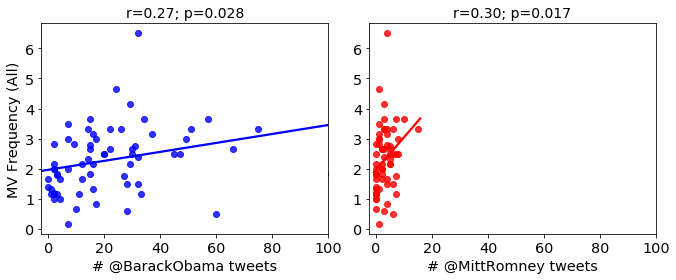

In [171]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all-2012.pdf', year=2012)

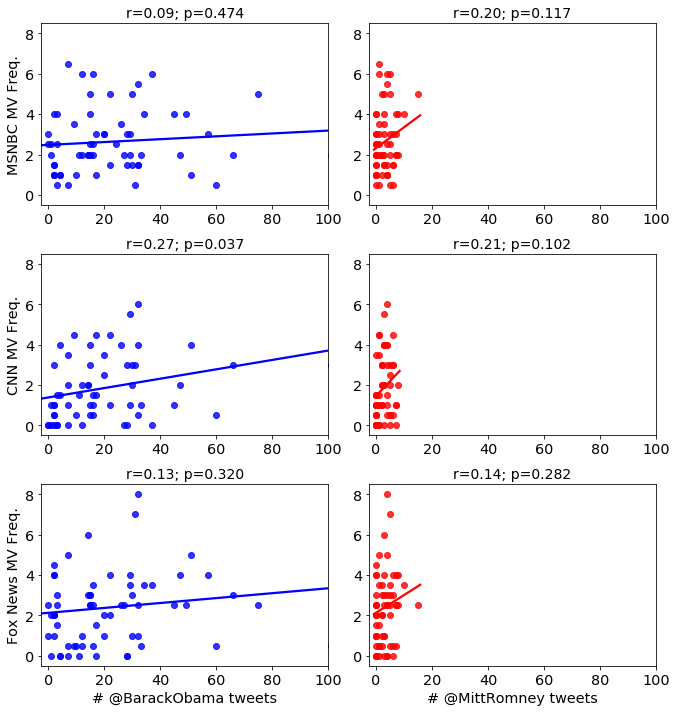

In [158]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-network-2012.pdf', year=2012)

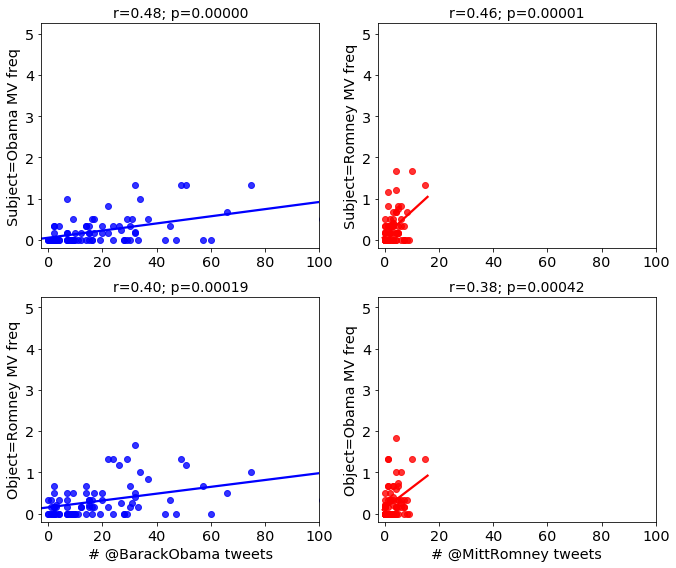

In [164]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj-2012.pdf', year=2012)

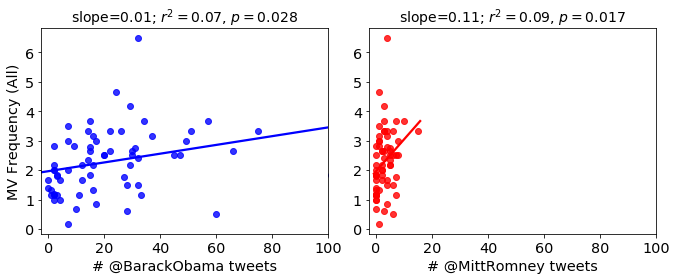

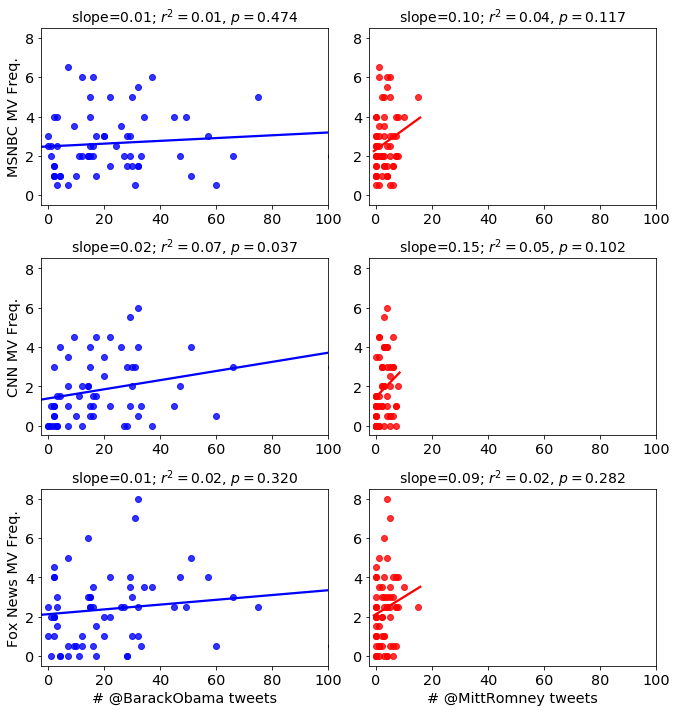

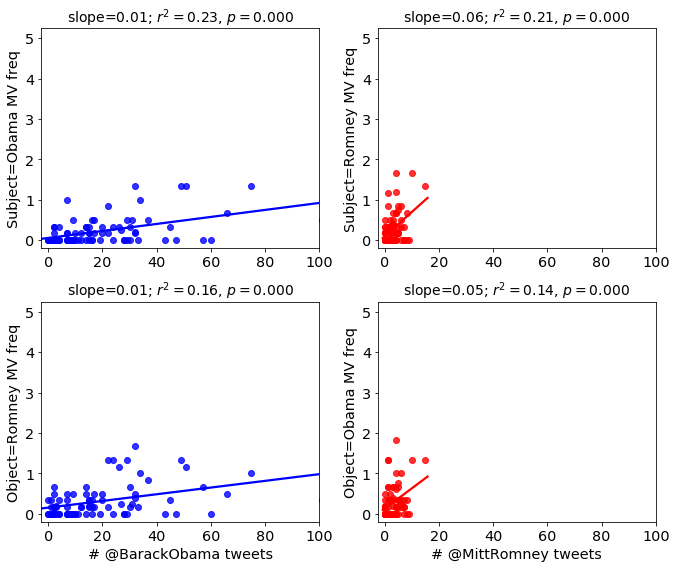

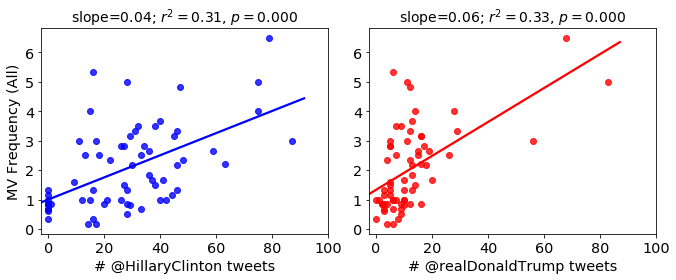

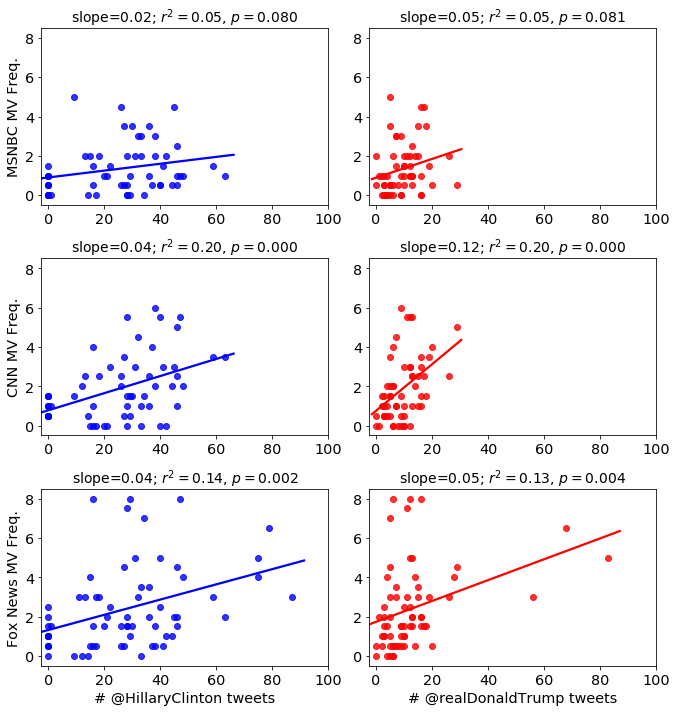

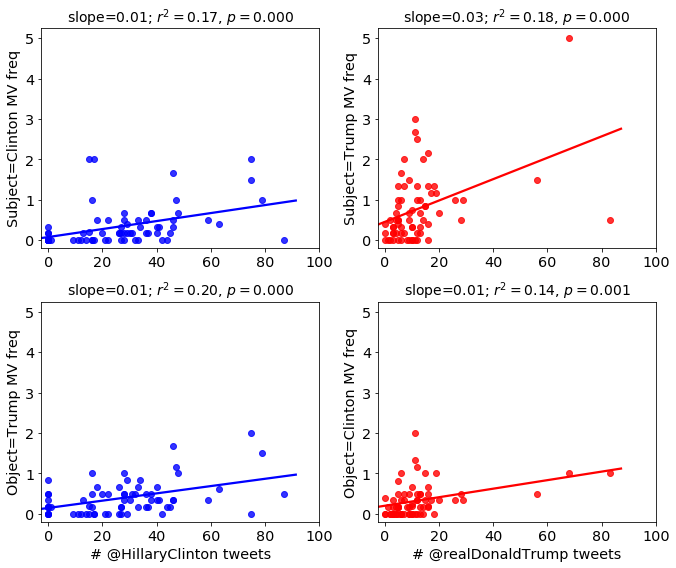

In [6]:
from correlate_tweets import (
    METAPHORS_URL_TEMPLATE, get_project_dataframe, correlate_data,
    plot_regressions
)

for year in [2012, 2016]:
    ts_all = correlate_data(year)
    for by in ['all', 'network', 'subjobj']:

        plot_regressions(
            ts_all, 
            by=by,
            save_path='/Users/mt/workspace/papers/viomet/natHumB/Figures/{}-{}.pdf'.format(
                year, by
            ), 
            year=year
        )

## Granger Causality



In [176]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
ts_all.head()

,clinton,metvi_all,metvi_clinton_obj,metvi_clinton_subj,metvi_cnn,metvi_foxnews,metvi_msnbc,metvi_trump_obj,metvi_trump_subj,trump
2016-09-01,20,0.833333,0.333333,0.166667,0,1.5,1,0.5,0.166667,12
2016-09-02,9,1.600000,0.800000,0.000000,1.5,0,5,0.0,0.400000,5
2016-09-03,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2016-09-04,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2016-09-05,12,1.000000,0.000000,0.000000,2,0,NaN,0.0,1.000000,6


In [191]:
# clinton_stationary = adfuller(ts_all['clinton'], maxlag=10)[1] < 5e-2
# print(clinton_stationary)
# trump_stationary = adfuller(ts_all['trump'], maxlag=10)[1] < 5e-2
# print(trump_stationary)
# metvi_all_stationary = adfuller(ts_all['metvi_all'].dropna(), maxlag=10)[1] < 5e-2
# print(metvi_all_stationary)
# print(adfuller(ts_all['metvi_all'].dropna()))

ts_maybe_diffed  = ts_all.copy()

diffed_list = []

for c in ts_all.columns:
    pval = adfuller(ts_all[c].dropna(), maxlag=10)[1]
    if not pval < 5e-2:
        print('{} not stationary; p={};'.format(c, pval))
        diffed = ts_all[c].diff().dropna()
        pval = adfuller(diffed, maxlag=10)[1]
        if not pval < 5e-2:
            print('diff of {} not stationary; p={}'.format(c, pval))
        ts_maybe_diffed[c] = diffed
        diffed_list.append(c)
print(diffed_list)

metvi_all not stationary; p=0.14056363744033412;
metvi_foxnews not stationary; p=0.37739121045872703;
metvi_trump_subj not stationary; p=0.07851907162894717;
['metvi_all', 'metvi_foxnews', 'metvi_trump_subj']


In [195]:
all_cols = list(ts_all.columns)

subs = ['clinton', 'trump']
metvi_cols = all_cols.copy()

for s in subs:
    metvi_cols.remove(s)
    
print(metvi_cols)

['metvi_all', 'metvi_clinton_obj', 'metvi_clinton_subj', 'metvi_cnn', 'metvi_foxnews', 'metvi_msnbc', 'metvi_trump_obj', 'metvi_trump_subj']


In [225]:
x1 = ts_maybe_diffed['metvi_all'].dropna()
x2 = ts_maybe_diffed['trump'][x1.index]
# print(x1.head().values)
# print(x2.head())
x = np.array([x1.values, x2.values])
# print(len(x1.values))
# print(x.shape)
# print(len(x))
grangercausalitytests(x.reshape(len(x1.values), 2), 10)

# for sub in subs:
    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6046  , p=0.0033  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=10.2310 , p=0.0014  , df=1
likelihood ratio test: chi2=9.2916  , p=0.0023  , df=1
parameter F test:         F=9.6046  , p=0.0033  , df_denom=46, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0650  , p=0.0242  , df_denom=43, df_num=2
ssr based chi2 test:   chi2=9.0753  , p=0.0107  , df=2
likelihood ratio test: chi2=8.3122  , p=0.0157  , df=2
parameter F test:         F=4.0650  , p=0.0242  , df_denom=43, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4629  , p=0.0030  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=19.2566 , p=0.0002  , df=3
likelihood ratio test: chi2=16.1392 , p=0.0011  , df=3
parameter F test:         F=5.4629  , p=0.0030  , df_denom=40, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7756  , p=0.0113  , df_d

{1: ({'lrtest': (9.291594670655286, 0.0023020767487791924, 1),
   'params_ftest': (9.604591429977484, 0.0033068478185344073, 46.0, 1.0),
   'ssr_chi2test': (10.230977827584702, 0.0013810143127224335, 1),
   'ssr_ftest': (9.604591429977475, 0.0033068478185344185, 46.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.312214018901955, 0.015668436418281556, 2),
   'params_ftest': (4.064995704963917, 0.024157045653015734, 43.0, 2.0),
   'ssr_chi2test': (9.075339248291524, 0.010698308606739957, 2),
   'ssr_ftest': (4.064995704963913, 0.024157045653015803, 43.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (16.139229640467647, 0.001061832282447009, 3),
   'params_ftest': (5.462872463243553, 0.0030437115185858207, 40.0, 3.0),
   'ssr_chi2test': (19.25662543293361, 0.00024194649460946685, 3),
   'ssr_ftest': (5.462872463243579, 0.0030437115185857405, 40.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
       